In [1]:
from collections import deque
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def breath_first_search(R, s, t):
        level = {x: -1 for x in R.nodes()}
        queue = deque([s])
        level[s] = 0
        while queue:
            u = queue.popleft()
            for v in R[u]:
                attr = R[u][v]
                if level[v] == -1:
                    level[v] = level[u] + 1
                    queue.append(v)
                    if level[t] != -1 and level[v] == level[t] and t != v:
                        return level
        return level

In [3]:
def bidirectional_breath_first_search(R, s, t):
    R_pred = R.pred
    level_s = {x: -1 for x in R.nodes()}
    level_t = {x: -1 for x in R.nodes()}
    q_s = deque([s])
    q_t = deque([t])
    level_s[s] = 0
    level_t[t] = 0
    last_level = False
    while q_s and q_t:
        if last_level == True:
            return level_s, level_t
        if len(q_s) <= len(q_t):
            layer_num = len(q_s)
            for _ in range(layer_num):
                u = q_s.popleft()
                for v, attr in R[u].items():
                    if level_s[v] == -1:
                        level_s[v] = level_s[u] + 1
                        if level_t[v] != -1:
                            last_level = True
                        q_s.append(v)
        else:
            layer_num = len(q_t)
            for _ in range(layer_num):
                u = q_t.popleft()
                for v, attr in R_pred[u].items():
                    if level_t[v] == -1:
                        level_t[v] = level_t[u] + 1
                        if level_s[v] != -1:
                            last_level = True
                        q_t.append(v)

    if last_level == False:
        return None, None

    return level_s, level_t

In [4]:
n = 30
G = nx.generators.random_graphs.barabasi_albert_graph(n, 1, seed = 67434)
H = G.to_directed()
s, t = 7, 5

In [5]:
nx.bidirectional_shortest_path(G, s, t)

[7, 6, 0, 1, 2, 5]

In [6]:
seed = 462

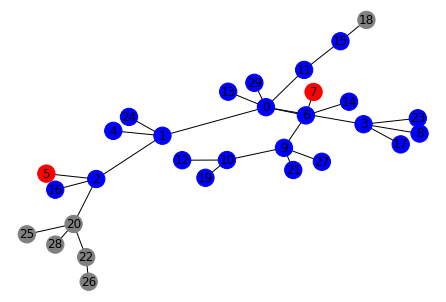

In [7]:
colormap_1 = []

level = breath_first_search(H, s, t)
for node in G.nodes:
    if node == s or node == t:
        colormap_1.append("red") 
    elif level[node] != -1:
        colormap_1.append("blue")
    else:
        colormap_1.append("grey")




my_pos = nx.spring_layout(G, seed = seed) 
nx.draw(G, node_color=colormap_1, pos = my_pos, with_labels=True)
plt.savefig("bfs_barabasi.png", dpi=500)
plt.show()

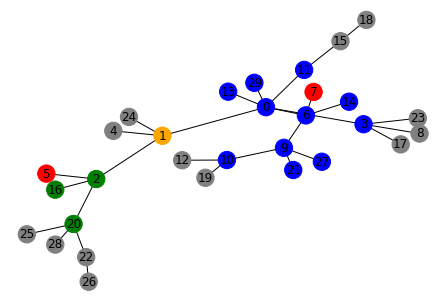

In [8]:
colormap_2 = []
level_s, level_t = bidirectional_breath_first_search(H, s, t)
for node in G.nodes:
    if node == s or node == t:
        colormap_2.append("red")
    elif level_s[node] != -1 and level_t[node] != -1:
        colormap_2.append("orange")
    elif level_s[node] != -1:
        colormap_2.append("blue")
    elif level_t[node] != -1:
        colormap_2.append("green")
    else:
        colormap_2.append("grey")
        
my_pos = nx.spring_layout(G, seed = seed) 
nx.draw(G, node_color=colormap_2, pos = my_pos, with_labels=True)
plt.savefig("ketiranyu_bfs_barabasi.png", dpi=500)
plt.show()

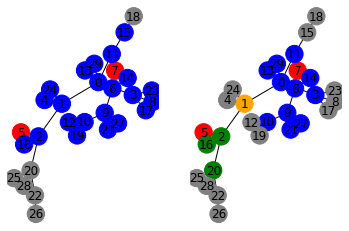

In [9]:
seed = 462

colormap_1 = []

level = breath_first_search(H, s, t)
for node in G.nodes:
    if node == s or node == t:
        colormap_1.append("red") 
    elif level[node] != -1:
        colormap_1.append("blue")
    else:
        colormap_1.append("grey")




my_pos = nx.spring_layout(G, seed = seed)
plt.subplot(121)
nx.draw(G, node_color=colormap_1, pos = my_pos, with_labels=True)


colormap_2 = []
level_s, level_t = bidirectional_breath_first_search(H, s, t)
for node in G.nodes:
    if node == s or node == t:
        colormap_2.append("red")
    elif level_s[node] != -1 and level_t[node] != -1:
        colormap_2.append("orange")
    elif level_s[node] != -1:
        colormap_2.append("blue")
    elif level_t[node] != -1:
        colormap_2.append("green")
    else:
        colormap_2.append("grey")
        
my_pos = nx.spring_layout(G, seed = seed)
plt.subplot(122)
nx.draw(G, node_color=colormap_2, pos = my_pos, with_labels=True)


plt.savefig("osszetett.png", dpi=500)
plt.show()


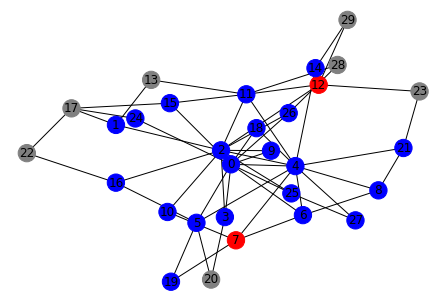

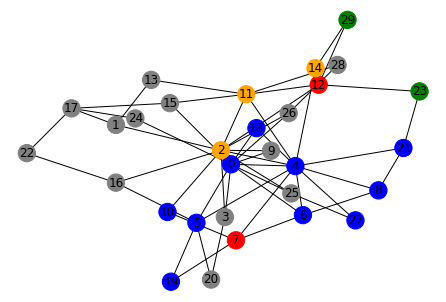

In [10]:
# Példa m = 2 esetre
m = 2
n = 30
G = nx.generators.random_graphs.barabasi_albert_graph(n, m, seed = 67434)
H = G.to_directed()
random.seed(25463)
s, t = random.sample(G.nodes, 2)
draw_seed = 784

colormap_1 = []

level = breath_first_search(H, s, t)
for node in G.nodes:
    if node == s or node == t:
        colormap_1.append("red") 
    elif level[node] != -1:
        colormap_1.append("blue")
    else:
        colormap_1.append("grey")




my_pos = nx.spring_layout(G, seed = seed) 
nx.draw(G, node_color=colormap_1, pos = my_pos, with_labels=True)
plt.show()

colormap_2 = []
level_s, level_t = bidirectional_breath_first_search(H, s, t)
for node in G.nodes:
    if node == s or node == t:
        colormap_2.append("red")
    elif level_s[node] != -1 and level_t[node] != -1:
        colormap_2.append("orange")
    elif level_s[node] != -1:
        colormap_2.append("blue")
    elif level_t[node] != -1:
        colormap_2.append("green")
    else:
        colormap_2.append("grey")
        
my_pos = nx.spring_layout(G, seed = seed) 
nx.draw(G, node_color=colormap_2, pos = my_pos, with_labels=True)
plt.show()

In [17]:
# Példa, hogy n = 10000, m = 6 esetén a kétbejárás hány csúcsot lát meg
m = 6
n = 10000
G = nx.generators.random_graphs.barabasi_albert_graph(n, m, seed = 67434)
H = G.to_directed()
random.seed(68435)
s, t = random.sample(G.nodes, 2)

vizsgalt_csucsok_bfs = 0
level = breath_first_search(H, s, t)
for node in G.nodes:
    if node == s or node == t:
        vizsgalt_csucsok_bfs += 1
    elif level[node] != -1:
        vizsgalt_csucsok_bfs += 1

vizsgalt_csucsok_bi_bfs = 0 
level_s, level_t = bidirectional_breath_first_search(H, s, t)
for node in G.nodes:
    if node == s or node == t:
        vizsgalt_csucsok_bi_bfs += 1
    elif level_s[node] != -1 and level_t[node] != -1:
        vizsgalt_csucsok_bi_bfs += 1
    elif level_s[node] != -1:
        vizsgalt_csucsok_bi_bfs += 1
    elif level_t[node] != -1:
        vizsgalt_csucsok_bi_bfs += 1

print("BFS során a meglátott csúcsok száma: " + str(vizsgalt_csucsok_bfs))
print("Kétirányú BFS során a meglátott csúcsok száma: " + str(vizsgalt_csucsok_bi_bfs))

BFS során a meglátott csúcsok száma: 5490
Kétirányú BFS során a meglátott csúcsok száma: 305


In [18]:
def teszt(H):
    s, t = random.sample(H.nodes, 2)
    vizsgalt_csucsok_bfs = 0
    level = breath_first_search(H, s, t)
    for node in H.nodes:
        if node == s or node == t:
            vizsgalt_csucsok_bfs += 1
        elif level[node] != -1:
            vizsgalt_csucsok_bfs += 1

    vizsgalt_csucsok_bi_bfs = 0 
    level_s, level_t = bidirectional_breath_first_search(H, s, t)
    for node in H.nodes:
        if node == s or node == t:
            vizsgalt_csucsok_bi_bfs += 1
        elif level_s[node] != -1 and level_t[node] != -1:
            vizsgalt_csucsok_bi_bfs += 1
        elif level_s[node] != -1:
            vizsgalt_csucsok_bi_bfs += 1
        elif level_t[node] != -1:
            vizsgalt_csucsok_bi_bfs += 1
    
    return vizsgalt_csucsok_bfs, vizsgalt_csucsok_bi_bfs

In [21]:
def average_test(n, m, rounds = 10):
    G = nx.generators.random_graphs.barabasi_albert_graph(n, m, seed = 6527)
    H = G.to_directed()
    random.seed(8647)
    bfs_csucsok = 0
    bi_bfs_csucsok = 0
    for _ in range(rounds):
        vizsgalt_csucsok_bfs, vizsgalt_csucsok_bi_bfs = teszt(H)
        bfs_csucsok += vizsgalt_csucsok_bfs
        bi_bfs_csucsok += vizsgalt_csucsok_bi_bfs
    bfs_csucsok = round(bfs_csucsok/rounds)
    bi_bfs_csucsok = round(bi_bfs_csucsok/rounds)
    return bfs_csucsok, bi_bfs_csucsok

In [22]:
df = pd.DataFrame(columns = ["csucsszam", "bfs_bejart_csucsok", "bi_bfs_bejart_csucsok"])
for n in np.logspace(2,4,num=15,base=10,dtype='int'):
    bfs_csucsok, bi_bfs_csucsok  = average_test(n, 5)
    new_row = {"csucsszam": n, "bfs_bejart_csucsok": bfs_csucsok, "bi_bfs_bejart_csucsok": bi_bfs_csucsok}
    df = df.append(new_row, ignore_index=True)

In [23]:
df

,csucsszam,bfs_bejart_csucsok,bi_bfs_bejart_csucsok
0,100,46,22
1,138,83,53
2,193,127,68
3,268,139,66
4,372,189,86
5,517,216,93
6,719,388,119
7,1000,432,114
8,1389,570,136
9,1930,655,145


In [234]:
from numpy.polynomial.polynomial import polyfit

In [237]:
def plot_stat(df):
    Fig, ax = plt.subplots()
    for j in range(len(df["csucsszam"])):
        for i, (mark, color) in enumerate(zip(['s', 'o'], ['r', 'b'])):
            plt.loglog(df["csucsszam"][j], df.iloc[:,i+1][j], color=color,
            marker=".",
            markerfacecolor='None',
            markeredgecolor=color,
            linestyle = 'None',
            label="i")
    x = df["csucsszam"].astype(str).astype(float)
    y1 = df["bfs_bejart_csucsok"].astype(str).astype(float)
    y2 = df["bi_bfs_bejart_csucsok"].astype(str).astype(float)
    b1, m1 = polyfit(np.log(x), np.log(y1), 1)
    b2, m2 = polyfit(np.log(x), np.log(y2), 1)
    print("A bfs által meglátott csúcsok száma e^" + str(round(b1, 2)) + "*n^" + str(round(m1, 3)) + "-el közelíthető")
    print("A kétirányú bfs által meglátott csúcsok száma e^" + str(round(b2, 2)) + "*n^" + str(round(m2, 3)) + "-el közelíthető")
    plt.loglog(x, x, '--', color='g')
    plt.loglog(x, np.exp(b1 + m1 * np.log(x)), '-', color="r")
    plt.loglog(x, np.exp(b2 + m2 * np.log(x)), '-', color="b")
    plt.legend(["bfs", "kétirányú_bfs"], loc = "upper left")
    plt.xlabel('gráf csúcsainak száma')
    plt.ylabel('meglátott csúcsok száma')
    
    plt.savefig('bfs_vs_bi_bfs.png', dpi=500)
    plt.show()

A bfs által meglátott csúcsok száma e^-0.6*n^0.982-el közelíthető
A kétirányú bfs által meglátott csúcsok száma e^1.36*n^0.496-el közelíthető


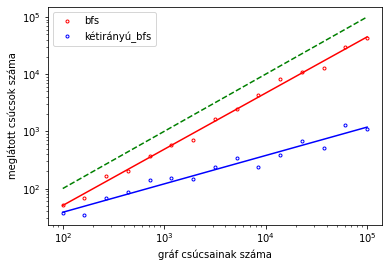

In [238]:
plot_stat(df)